## Area summation curves with flashing spot stimulus

A flashing spot stimulus (duration=500 ms) is used to calculate the area summation curves. We consider the following scenarios:

* Inhibitory feedback with different weights (solid lines: $\Delta^{in}_{RCR}=5 ms$, dashed lines: $\Delta^{in}_{RCR}=30 ms$ )

* Excitatory feedback with different weights (solid lines:  $\Delta^{ex}_{RCR}=5 ms$, dashed lines:  $\Delta^{ex}_{RCR}=30 ms$ )

* Mixed feedback with different weights (solid lines: delayed inhibition ($\Delta^{ex}_{RCR}=5 ms, \Delta^{in}_{RCR}=30 ms$), dashed lines: delayed excitation ($\Delta^{ex}_{RCR}=30 ms, \Delta^{in}_{RCR}=5 ms$))




In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import numpy as np
import matplotlib.pyplot as plt
import quantities as pq
from operator import itemgetter
from edog.tools import*
from edog.plot import*
plt.style.use('seaborn')
plt.rcParams.update(edog.plot.params)

filename = "params.yaml"
params = parse_parameters(filename)

nt, nr, dt, dr = itemgetter("nt", "nr", "dt", "dr")(params["grid"])
stim_delay, duration, patch_diameter = itemgetter("delay", "duration", "patch_diameter")(params["stimulus"])

A_g, a_g, B_g, b_g = itemgetter("A", "a", "B", "b")(params["ganglion"])
phase, damping, delay_g = itemgetter("phase", "damping", "delay")(params["ganglion"])

w_rg, A_rg, a_rg = itemgetter("w", "A", "a")(params["relay"]["Krg"])
tau_rg, delay_rg = itemgetter("tau", "delay")(params["relay"]["Krg"])

w_rig, A_rig, a_rig = itemgetter("w", "A", "a")(params["relay"]["Krig"])
tau_rig, delay_rig = itemgetter("tau", "delay")(params["relay"]["Krig"])

w_rc_ex, A_rc_ex, a_rc_ex = itemgetter("w", "A", "a")(params["relay"]["Krc_ex"])
tau_rc_ex, delay_rc_ex = itemgetter("tau", "delay")(params["relay"]["Krc_ex"])

w_rc_in, A_rc_in, a_rc_in = itemgetter("w", "A", "a")(params["relay"]["Krc_in"])
tau_rc_in, delay_rc_in = itemgetter("tau", "delay")(params["relay"]["Krc_in"])

w_rc_mix = itemgetter("w")(params["relay"]["Krc_mix"])
A_rc_mix_in, a_rc_mix_in = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_in"])
tau_rc_mix_in = itemgetter("tau")(params["relay"]["Krc_mix"]["Krc_in"])
A_rc_mix_ex, a_rc_mix_ex = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_ex"])
tau_rc_mix_ex = itemgetter("tau")(params["relay"]["Krc_mix"]["Krc_ex"])

delayed_in, delayed_ex = itemgetter("delayed_in", "delayed_ex")(params["relay"]["Krc_mix"])
stim_off_index = int(round(duration / dt))

size_tuning = {"fb_ex": {}, "fb_in": {}, "fb_mix": {}}

## Feedback excitation

In [2]:
for k, delay in enumerate(delay_rc_ex):
    print("temporal delay:", delay)
    size_tuning["fb_ex"][k] = {}
    tuning_curve = np.zeros([len(w_rc_ex), len(patch_diameter)])
    cen_size = np.zeros(len(w_rc_ex))
    supp_index = np.zeros(len(w_rc_ex))
    
    for i, w in enumerate(w_rc_ex):
        network = create_spatiotemporal_network(nt=nt, nr=nr, dt=dt, dr=dr,
                                                A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                                phase=phase, damping=damping, delay_g=delay_g,
                                                w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                                tau_rg=tau_rg, delay_rg=delay_rg,
                                                w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                                tau_rig=tau_rig, delay_rig=delay_rig,
                                                w_rc_ex=w, A_rc_ex=A_rc_ex, a_rc_ex=a_rc_ex,
                                                tau_rc_ex=tau_rc_ex, delay_rc_ex=delay)

        spatiotemporal_tuning = spatiotemporal_size_tuning_flash(network=network, 
                                                                 patch_diameter=patch_diameter,
                                                                 delay=stim_delay,
                                                                 duration=duration)

        tuning_curve[i, :] = np.mean(spatiotemporal_tuning[:stim_off_index, :], axis=0)

        cen_size[i] = rf_center_size(tuning_curve[i, :], patch_diameter)
        supp_index[i] = compute_suppression_index(tuning_curve[i, :])

    size_tuning["fb_ex"][k] = {"tuning_curve": tuning_curve, 
                               "cen_size": cen_size, 
                               "supp_index": supp_index}

temporal delay: 5.0 ms
temporal delay: 30.0 ms


## Feedback inhibition

In [3]:
for k, delay in enumerate(delay_rc_in):
    print("temporal delay:", delay)
    size_tuning["fb_in"][k] = {}
    tuning_curve = np.zeros([len(w_rc_in), len(patch_diameter)])
    cen_size = np.zeros(len(w_rc_in))
    supp_index = np.zeros(len(w_rc_in))
    
    for i, w in enumerate(w_rc_in):
        network = create_spatiotemporal_network(nt=nt, nr=nr, dt=dt, dr=dr,
                                                A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                                phase=phase, damping=damping, delay_g=delay_g,
                                                w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                                tau_rg=tau_rg, delay_rg=delay_rg,
                                                w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                                tau_rig=tau_rig, delay_rig=delay_rig,
                                                w_rc_in=w, A_rc_in=A_rc_in, a_rc_in=a_rc_in,
                                                tau_rc_in=tau_rc_in, delay_rc_in=delay)

        spatiotemporal_tuning = spatiotemporal_size_tuning_flash(network=network, 
                                                                 patch_diameter=patch_diameter,
                                                                 delay=stim_delay,
                                                                 duration=duration)

        tuning_curve[i, :] = np.mean(spatiotemporal_tuning[:stim_off_index,:], axis=0)

        cen_size[i] = rf_center_size(tuning_curve[i, :], patch_diameter)
        supp_index[i] = compute_suppression_index(tuning_curve[i, :])

    size_tuning["fb_in"][k] = {"tuning_curve": tuning_curve, 
                               "cen_size": cen_size, 
                               "supp_index": supp_index}

temporal delay: 5.0 ms
temporal delay: 30.0 ms


## Mixed excitatory and inhibitory feedback

In [4]:
for k, params in enumerate([delayed_in, delayed_ex]):
    print("temporal delay:", params)
    size_tuning["fb_mix"][k] = {}
    tuning_curve = np.zeros([len(w_rc_mix), len(patch_diameter)])
    cen_size = np.zeros(len(w_rc_mix))
    supp_index = np.zeros(len(w_rc_mix))
    
    for i, w in enumerate(w_rc_mix):
        network = create_spatiotemporal_network(nt=nt, nr=nr, dt=dt, dr=dr,
                                                A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                                phase=phase, damping=damping, delay_g=delay_g,
                                                w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                                tau_rg=tau_rg, delay_rg=delay_rg,
                                                w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                                tau_rig=tau_rig, delay_rig=delay_rig,
                                                w_rc_ex=w, A_rc_ex=A_rc_mix_ex, a_rc_ex=a_rc_mix_ex,
                                                tau_rc_ex=tau_rc_mix_ex, delay_rc_ex=params["delay_ex"],
                                                w_rc_in=w, A_rc_in=A_rc_mix_in, a_rc_in=a_rc_mix_in,
                                                tau_rc_in=tau_rc_mix_in, delay_rc_in=params["delay_in"])

        spatiotemporal_tuning = spatiotemporal_size_tuning_flash(network=network, 
                                                                 patch_diameter=patch_diameter,
                                                                 delay=stim_delay,
                                                                 duration=duration)

        tuning_curve[i, :] = np.mean(spatiotemporal_tuning[:stim_off_index,:], axis=0)

        cen_size[i] = rf_center_size(tuning_curve[i, :], patch_diameter)
        supp_index[i] = compute_suppression_index(tuning_curve[i, :])


    size_tuning["fb_mix"][k] = {"tuning_curve": tuning_curve, 
                                "cen_size": cen_size, 
                                "supp_index": supp_index}

temporal delay: {'delay_in': array(30) * ms, 'delay_ex': array(5) * ms}
temporal delay: {'delay_in': array(5) * ms, 'delay_ex': array(30) * ms}


-------------
## Plotting

<IPython.core.display.Javascript object>


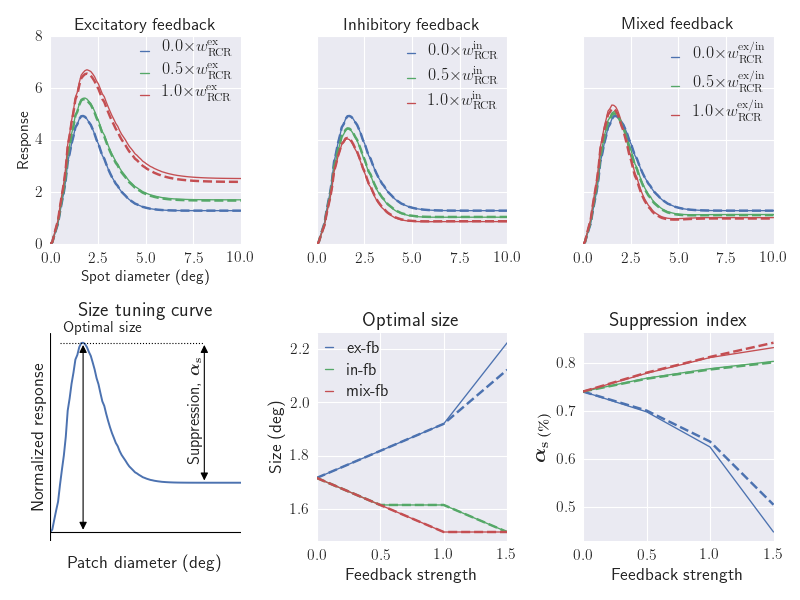

In [9]:
titles = ["Excitatory feedback", 
          "Inhibitory feedback", 
          "Mixed feedback"]
labels = [r"$w^\mathrm{ex}_{\mathrm{RCR}}$", 
          r"$w^\mathrm{in}_{\mathrm{RCR}}$", 
          r"$w^\mathrm{ex/in}_{\mathrm{RCR}}$"]

short_labels = ["ex-fb", "in-fb", "mix-fb"]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10, 7.5))

# Size tuning curves:
for k, linestyle in enumerate(["-", "--"]):
    for ax, w_rc, curves, title, label in zip([ax1, ax2, ax3],
                                               [w_rc_ex, w_rc_in, w_rc_mix], 
                                               [size_tuning["fb_ex"][k]["tuning_curve"], 
                                                size_tuning["fb_in"][k]["tuning_curve"], 
                                                size_tuning["fb_mix"][k]["tuning_curve"]],
                                               titles, labels):

        for w, curve, color in zip(w_rc[:-1], curves[:-1], ["C0", "C1", "C2"]):
            if k == 0:
                label_=r"${} \times $".format(round(w, 1))+label
                lw = 1.2 
            else:
                label_=""
                lw = 2.2
            ax.plot(patch_diameter, curve, linestyle, color=color, lw=lw, label=label_)

        ax.set_xlim([0, 10])
        ax.set_ylim([0, 8])
        ax.legend(fontsize=15, handlelength=0.5, labelspacing=0.4, borderpad=0.0)
        ax.set_title(title)


    ax1.set_ylabel("Response")
    ax1.set_xlabel("Spot diameter (deg)")
    ax2.set_yticklabels([])
    ax3.set_yticklabels([])


    if k == 0:
        label_= short_labels
    else:
        label_=["", "", ""]
    
    # optimal size
    ax5.plot(w_rc_ex, size_tuning["fb_ex"][k]["cen_size"], linestyle, color="C0", lw=lw, label=label_[0])
    ax5.plot(w_rc_in, size_tuning["fb_in"][k]["cen_size"], linestyle, color="C1", lw=lw, label=label_[1])
    ax5.plot(w_rc_mix, size_tuning["fb_mix"][k]["cen_size"], linestyle, color="C2", lw=lw, label=label_[2])

    # suppression index
    ax6.plot(w_rc_ex, size_tuning["fb_ex"][k]["supp_index"], linestyle, color="C0", lw=lw, label=label_[0])
    ax6.plot(w_rc_in, size_tuning["fb_in"][k]["supp_index"], linestyle, color="C1", lw=lw, label=label_[1])
    ax6.plot(w_rc_mix, size_tuning["fb_mix"][k]["supp_index"], linestyle, color="C2", lw=lw, label=label_[2])


ax5.legend(fontsize=15, handlelength=0.5, labelspacing=0.4, borderpad=0.0)
ax5.set_title("Optimal size", fontsize=18)
ax5.set_ylabel("Size (deg)", fontsize=16)
ax5.set_xlabel("Feedback strength", fontsize=16)
ax5.set_xlim([0, 1.5])

ax6.set_title(r"Suppression index", fontsize=18)
ax6.set_ylabel(r"$\boldsymbol{\alpha_\mathrm{s\;(\%)}}$", fontsize=18)
ax6.set_xlabel("Feedback strength", fontsize=16)
ax6.set_xlim([0, 1.5])

# illustrative figure
curve = size_tuning["fb_ex"][0]["tuning_curve"][0,:]
norm_curve = (curve - curve.min()) / (curve - curve.min()).max()

ax4.plot(patch_diameter, norm_curve)
ax4.set_xlim([0, 10])
ax4.set_ylabel("Normalized response", fontsize=16)
ax4.set_xlabel("Patch diameter (deg)", labelpad=20, fontsize=16)
ax4.set_title("Size tuning curve", y=1.05, fontsize=18)

ax4.spines['left'].set_position(('data', 0))
ax4.spines['right'].set_color('none')
ax4.spines['top'].set_color('none')
ax4.spines['bottom'].set_position(('data', 0))

ax4.xaxis.set_ticks_position('none')
ax4.yaxis.set_ticks_position('none')

ax4.set_yticks([])
ax4.set_xticks([])

ax4.grid(False)

ax4.set_facecolor("w")
ax4.axhline(y=0, color='k', linewidth=1.)
ax4.axvline(x=0, color='k', linewidth=1.)


max_id = np.where(norm_curve == norm_curve.max())
xmax = patch_diameter[max_id].magnitude
ymax = norm_curve.max()
xsteady = patch_diameter[-20].magnitude
ysteady = norm_curve[-20]

ax4.plot([0.5, patch_diameter[-20]], [ymax, ymax], color='k', linewidth=1, linestyle=":")

ax4.annotate("Optimal size", xy=(xmax-1., ymax+ymax*0.05), xycoords='data', xytext=(-1, +1), 
             textcoords='offset points', fontsize=14)
ax4.annotate("", xy=(xmax, 0), xycoords='data', xytext=(xmax, ymax), textcoords='data',
             arrowprops={'arrowstyle': '<|-|>', 'linestyle': '-', 'linewidth': 1, 'color': 'k'})

ax4.annotate(r"Suppression, $\boldsymbol{\alpha_\mathrm{s}}$", xy=(xsteady-0.7, (ymax-ysteady)*1.15), 
             xycoords='data', xytext=(-1, +1), textcoords='offset points', rotation=90, fontsize=15)
ax4.annotate("", xy=(xsteady, ysteady), xycoords='data', xytext=(xsteady, ymax), textcoords='data',
             arrowprops={'arrowstyle': '<|-|>', 'linestyle': '-', 'linewidth': 1, 'color': 'k'})

fig.tight_layout()